In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

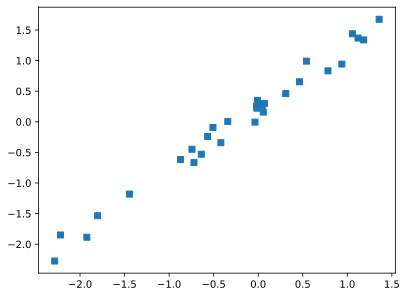

In [7]:
N = 30
x = torch.randn(N, 1)
y = x + torch.rand(N, 1)/2

plt.plot(x, y, 's')
plt.show()

In [9]:
ANN_reg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

ANN_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [10]:
learning_rate = 0.05

loss_func = nn.MSELoss()

optimizer = torch.optim.SGD(ANN_reg.parameters(), lr=learning_rate)

In [11]:
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    #forward pass
    yHat = ANN_reg(x)

    #compute loss
    loss = loss_func(yHat, y)
    losses[epochi] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

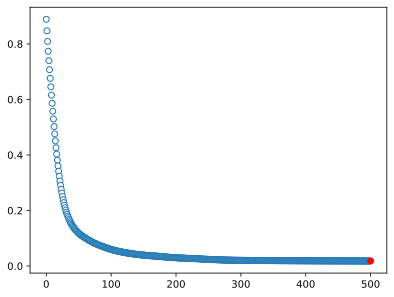

In [13]:
#final forward pass
predictions = ANN_reg(x)

#final loss(MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(numepochs, testloss.detach(), 'ro')
plt.show()

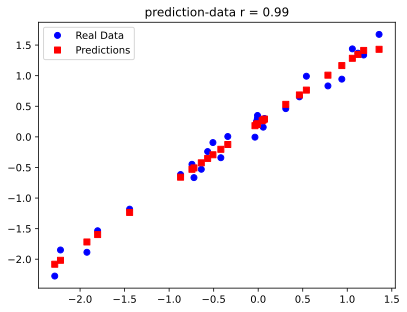

In [17]:
plt.plot(x,y, 'bo', label='Real Data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')
plt.title(f'prediction-data r = {np.corrcoef(y.T, predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()